# Lab work 9
## Numerical solving of the transfer equation

We consider an 1-dimensional partial differential transfer equation of the first order 
$$ u_t + a u_x = 0 $$ on the interval $ t > 0, 0 < x < 1 $ 
with boundary conditions $$ u(0, t) = \mu(t) $$
                         $$ u(x, 0) = u_0(x) $$

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Initial condition functions
start = 0.2
stop = 0.8
height = 1

def u1(x):
    if x >= start and x <= stop:
        return np.sin((x - start) * np.pi / (stop - start)) ** 2
    else:
        return 0

def u2(x):
    if x > start and x < stop:
        return height
    else:
        return 0

def u3(x):
    if x <= start:
        return height
    else:
        return 0

def u4(x):
    if x >= stop:
        return height
    else:
        return 0

def mu0(t):
    return 0

def mu1(t):
    return height

def real(f, x, t, a):
    N = len(x)
    y = np.zeros(N)
    for i in range(len(x)):
        y[i] = f(x[i] - a*t)
    return y

## 1. Explicit left corner

Firstly we split our intervals and make a 2-dimensional grid:  
$ t \in [0,T] $ with step $ \tau = \frac{T}{M} $  
$ x \in [0,1] $ with step $ h = \frac{1}{N} $  

Let's make a difference scheme with first order of approximation of first derivatives:
$$ \frac{u_i^{j+1} - u_i^j}{\tau} + a \frac{u_i^j - u_{i-1}^j}{h} = 0 $$
where index $ i \in [0, N] $ - space index and $ j \in [0, M] $ - time index  
The stencil: $$  ~~~~~~~~~~~~~~    * $$
             $$  ~~~~~~~~~~~~~~    | $$
             $$  *---* $$
If define the Courant number as $ C = \frac{a \tau}{h} $, we can get the sufficient sign of stability: $ C < 1 $

Courant number:  0.5


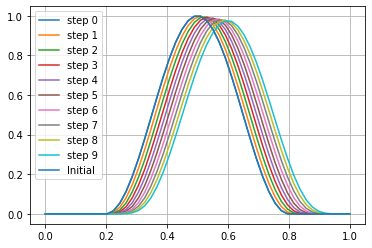

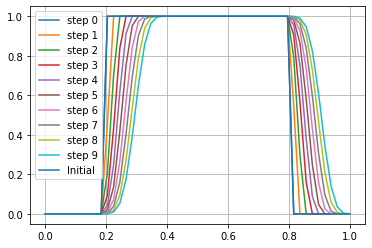

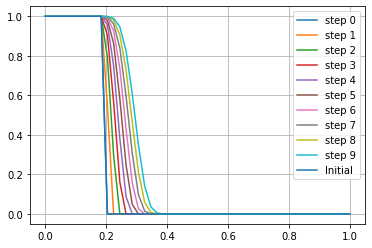

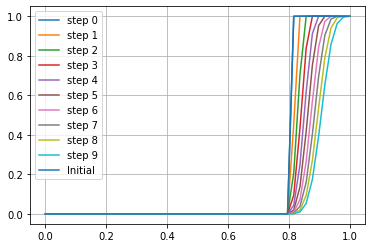

In [166]:
def explLeftCorner(u0, mu, x, t, a):
    N = len(x)
    M = len(t)
    h = x[1] - x[0]
    tau = t[1] - t[0]
    U = np.zeros((M, N))
    for i in range(N):
        U[0][i] = u0(x[i])
    for j in range(M-1):
        U[j+1][0] = mu(t[j+1])
        for i in range(1, N):
            U[j+1][i] = U[j][i] - tau*a*(U[j][i] - U[j][i-1])/h
    return U

T = 10
N = 50
M = 10
h = 1 / N
tau = T / M
x = np.linspace(0, 1, N)
t = np.linspace(0, T, M)
a = 0.01

courant = a * tau / h
print("Courant number: ", courant)

res1 = explLeftCorner(u1, mu0, x, t, a)
res2 = explLeftCorner(u2, mu0, x, t, a)
res3 = explLeftCorner(u3, mu1, x, t, a)
res4 = explLeftCorner(u4, mu0, x, t, a)

init1 = []
for i in range(N):
    init1.append(u1(x[i]))
init2 = []
for i in range(N):
    init2.append(u2(x[i]))
init3 = []
for i in range(N):
    init3.append(u3(x[i]))    
init4 = []
for i in range(N):
    init4.append(u4(x[i]))

plt.figure(1)
for i in range(M):
    plt.plot(x, res1[i], label='step ' + str(i))
plt.plot(x, init1, label='Initial')
plt.grid()
plt.legend()

plt.figure(2)
for i in range(M):
    plt.plot(x, res2[i], label='step ' + str(i))
plt.plot(x, init2, label='Initial')
plt.grid()
plt.legend()

plt.figure(3)
for i in range(M):
    plt.plot(x, res3[i], label='step ' + str(i))
plt.plot(x, init3, label='Initial')
plt.grid()
plt.legend()

plt.figure(4)
for i in range(M):
    plt.plot(x, res4[i], label='step ' + str(i))
plt.plot(x, init4, label='Initial')
plt.grid()
plt.legend()

plt.show()

## 1.2 Approximation

Order of approximation =  1.0038747298440496


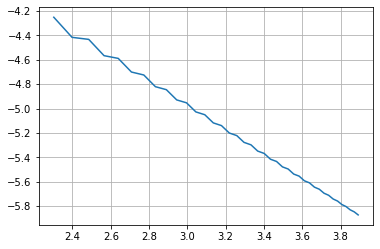

In [172]:
def getDiff(list1, list2):
    N = len(list1[-1])
    result = np.zeros(N)
    for i in range(N):
        result[i] = abs(list1[-1][i] - list2[i])
    return result

start_range = 10
end_range = 50

plt.figure()
index = np.log([i for i in range(start_range, end_range)])
value = np.log([max(getDiff(explLeftCorner(u1, mu0, np.linspace(0, 1, i), np.linspace(0, T, i), a),
                        real(u1, np.linspace(0, 1, i), T, a))) for i in range(start_range, end_range)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of approximation = ", -a1)
plt.plot(index, value)
plt.grid()
plt.show()

## 2. Implicit left corner

Let's make a difference scheme with first order of approximation of first derivatives:
$$ \frac{u_i^{j+1} - u_i^j}{\tau} + a \frac{u_i^{j+1} - u_{i-1}^{j+1}}{h} = 0 $$
where index $ i \in [0, N] $ - space index and $ j \in [0, M] $ - time index  
The stencil: $$  *---* $$
             $$  ~~~~~~~~~~~~~~    | $$
             $$  ~~~~~~~~~~~~~~    * $$
             
If define the Courant number as $ C = \frac{a \tau}{h} $, we can get the sufficient sign of stability: $ C > 0, C \le -1 $

Courant number:  1.0000000000000002


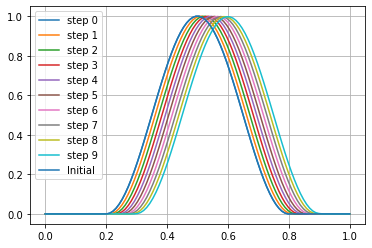

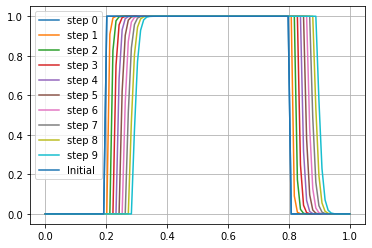

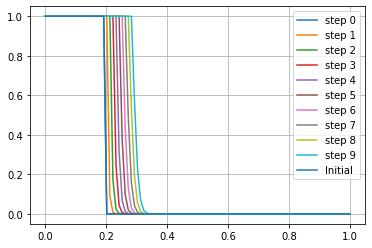

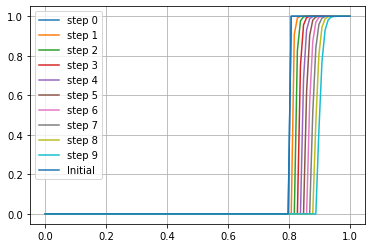

In [168]:
def implLeftCorner(u0, mu, x, t, a):
    N = len(x)
    M = len(t)
    h = x[1] - x[0]
    tau = t[1] - t[0]
    U = np.zeros((M, N))
    for i in range(N):
        U[0][i] = u0(x[i])
    for j in range(M-1):
        U[j+1][0] = mu(t[j+1])
        for i in range(N-1):
            U[j+1][i+1] = U[j+1][i] - h/a/tau*(U[j+1][i] - U[j][i])
    return U

T = 1
N = 100
M = 10
h = 1 / N
tau = T / M
x = np.linspace(0, 1, N)
t = np.linspace(0, T, M)
a = 0.1

courant = a * tau / h
print("Courant number: ", courant)

res1 = implLeftCorner(u1, mu0, x, t, a)
res2 = implLeftCorner(u2, mu0, x, t, a)
res3 = implLeftCorner(u3, mu1, x, t, a)
res4 = implLeftCorner(u4, mu0, x, t, a)

init1 = []
for i in range(N):
    init1.append(u1(x[i]))
init2 = []
for i in range(N):
    init2.append(u2(x[i]))
init3 = []
for i in range(N):
    init3.append(u3(x[i]))    
init4 = []
for i in range(N):
    init4.append(u4(x[i]))

plt.figure(1)
for i in range(M):
    plt.plot(x, res1[i], label='step ' + str(i))
plt.plot(x, init1, label='Initial')
plt.grid()
plt.legend()

plt.figure(2)
for i in range(M):
    plt.plot(x, res2[i], label='step ' + str(i))
plt.plot(x, init2, label='Initial')
plt.grid()
plt.legend()

plt.figure(3)
for i in range(M):
    plt.plot(x, res3[i], label='step ' + str(i))
plt.plot(x, init3, label='Initial')
plt.grid()
plt.legend()

plt.figure(4)
for i in range(M):
    plt.plot(x, res4[i], label='step ' + str(i))
plt.plot(x, init4, label='Initial')
plt.grid()
plt.legend()

plt.show()

## 2.2 Approximation

Order x of approximation =  1.2525908204049976


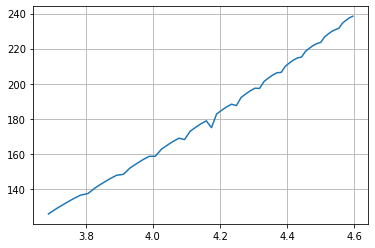

Order of t approximation =  1.1096149053902316


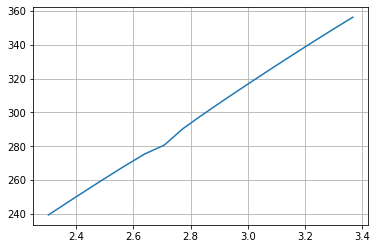

In [174]:
start_range = 40
end_range = 100

plt.figure()
index = np.log([i for i in range(start_range, end_range)])
value = np.log([max(getDiff(implLeftCorner(u1, mu0, np.linspace(0, 1, i), np.linspace(0, T, M), a),
                        real(u1, np.linspace(0, 1, i), T, a))) for i in range(start_range, end_range)])
a1, b1 = np.polyfit(index, value, 1)
print("Order x of approximation = ", a1/100)
plt.plot(index, value)
plt.grid()
plt.show()

start_range2 = 10
end_range2 = 30
N2 = 100
plt.figure(2)
index = np.log([i for i in range(start_range2, end_range2)])
value = np.log([max(getDiff(implLeftCorner(u1, mu0, np.linspace(0, 1, N2), np.linspace(0, T, i), a),
                        real(u1, np.linspace(0, 1, N2), T, a))) for i in range(start_range2, end_range2)])
a2, b2 = np.polyfit(index, value, 1)
print("Order of t approximation = ", a2/100)
plt.plot(index, value)
plt.grid()
plt.show()

## 3. Lax-Wendroff scheme

Lax-Wendroff scheme is a composition of 2 schemes: Lax scheme and the cross scheme.  
1) We count values $u_L$ and $u_R$ on the $(i+1/2) $ time layer with using Lax scheme:
$$ \frac{u_L - 1/2 (u_{i-1}^j + u_i^j)}{\tau/2} + a \frac{u_i^j - u_{i-1}^j}{h} = 0 $$
$$ \frac{u_R - 1/2 (u_{i+1}^j + u_i^j)}{\tau/2} + a \frac{u_{i+1}^j - u_{i}^j}{h} = 0 $$
with the stencil: $$      * $$
                  $$      | $$
                  $$  *---* $$

2) We use the cross scheme with points $ u_L, u_R, u_i^j, u_i^{j+1} $:
$$ \frac{u_i^{j+1} - u_i^j}{\tau^2} + a \frac{u_R - u_L}{h^2} = 0 $$
with the stencil: $$      * $$
                  $$      | $$
                  $$    *---*   $$
                  $$      | $$
                  $$      * $$

In the sum we have the next stencil:
$$ * $$
$$ | $$
$$  x---x $$
$$ | $$
$$  *---*---* $$

Courant number:  0.025


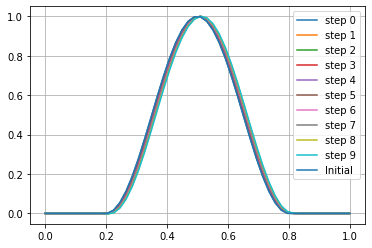

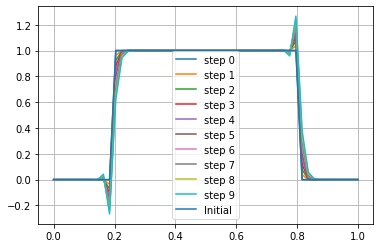

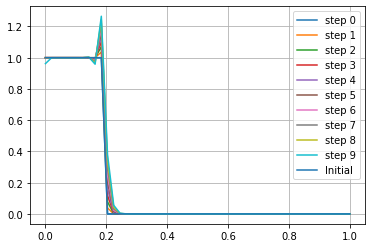

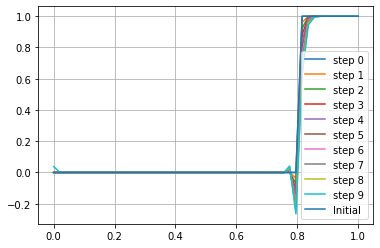

In [170]:
def LaxWendroff(u0, mu, x, t, a):
    N = len(x)
    M = len(t)
    h = x[1] - x[0]
    tau = t[1] - t[0]
    U = np.zeros((M, N))
    for i in range(N):
        U[0][i] = u0(x[i])
    U[-1][0] = mu(t[-1])
    U[-1][-1] = U[0][-1]
    for j in range(M-1):
        U[j][0] = mu(t[j])
        U[j][-1] = U[0][-1]
        for i in range(N-1):
            UR = (U[j][i+1] + U[j][i])/2 - tau*a/2/h*(U[j][i+1] - U[j][i])
            UL = (U[j][i] + U[j][i-1])/2 - tau*a/2/h*(U[j][i] - U[j][i-1])
            U[j+1][i] = U[j][i] - a/h/h*(UR - UL)*tau*tau
    return U

T = 0.5
N = 50
M = 10
h = 1 / N
tau = T / M
x = np.linspace(0, 1, N)
t = np.linspace(0, T, M)
a = 0.01

courant = a * tau / h
print("Courant number: ", courant)

res1 = LaxWendroff(u1, mu0, x, t, a)
res2 = LaxWendroff(u2, mu0, x, t, a)
res3 = LaxWendroff(u3, mu1, x, t, a)
res4 = LaxWendroff(u4, mu0, x, t, a)

init1 = []
for i in range(N):
    init1.append(u1(x[i]))
init2 = []
for i in range(N):
    init2.append(u2(x[i]))
init3 = []
for i in range(N):
    init3.append(u3(x[i]))    
init4 = []
for i in range(N):
    init4.append(u4(x[i]))

plt.figure(1)
for i in range(M):
    plt.plot(x, res1[i], label='step ' + str(i))
plt.plot(x, init1, label='Initial')
plt.grid()
plt.legend()

plt.figure(2)
for i in range(M):
    plt.plot(x, res2[i], label='step ' + str(i))
plt.plot(x, init2, label='Initial')
plt.grid()
plt.legend()

plt.figure(3)
for i in range(M):
    plt.plot(x, res3[i], label='step ' + str(i))
plt.plot(x, init3, label='Initial')
plt.grid()
plt.legend()

plt.figure(4)
for i in range(M):
    plt.plot(x, res4[i], label='step ' + str(i))
plt.plot(x, init4, label='Initial')
plt.grid()
plt.legend()

plt.show()

## 3.2 Approximation

Order of x approximation =  2.013228457578789


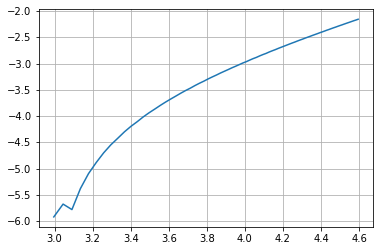

Order of t approximation =  1.9860296588380524


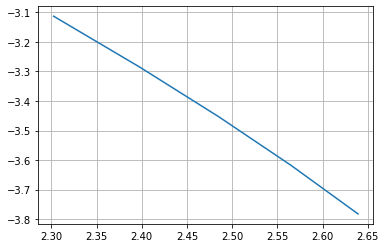

In [171]:
start_range = 20
end_range = 100

plt.figure(1)
index = np.log([i for i in range(start_range, end_range)])
value = np.log([max(getDiff(LaxWendroff(u1, mu0, np.linspace(0, 1, i), np.linspace(0, T, M), a),
                        real(u1, np.linspace(0, 1, i), T, a))) for i in range(start_range, end_range)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of x approximation = ", a1)
plt.plot(index, value)
plt.grid()
plt.show()


start_range2 = 10
end_range2 = 15

plt.figure(2)
index = np.log([i for i in range(start_range2, end_range2)])
value = np.log([max(getDiff(LaxWendroff(u1, mu0, np.linspace(0, 1, N), np.linspace(0, T, i), a),
                        real(u1, np.linspace(0, 1, N), T, a))) for i in range(start_range2, end_range2)])
a2, b2 = np.polyfit(index, value, 1)
print("Order of t approximation = ", -a2)
plt.plot(index, value)
plt.grid()
plt.show()